# **Topic:** Quarter Back Sports Analytics (NFL)

## **Question:** Which Quarterback stats indicates most postseason success for NFL teams?

### **Group Members:** Gabriel Maayah, Leandro Zhang, Ellie Oh, Jewelle Tatad, Kane Yokoyama




In order to create a more focused and specific research question our group decided to focus on the main player of the sport, the quarterback. This is the most important position in Football and is what usually makes or breaks a team.

Some particular stats we will choose to focus on are percentage of NFL throws that were interceptions, average amount of sacks, passing and rushing yards, completion percent,  total touchdowns, and individual player’s NFL QBR(Quarterback Rating).

To conduct this analysis we chose to work with a new dataset that includes an extensive quarterback database of all quarterbacks from 2000 to 2023, which includes actual real game stats from the 2000 to 2024 season. This dataset includes everything from a quarterback's physical attributes to all NFL statistics you could ask for. It also includes college stats, but for this project we strictly want to focus on the NFL. 

To ensure we only include QBs who have actually played a game we are only going to include players that have had at least 16 games played which is at least one full season where they were the starting quarterback.


Dataset:
https://www.kaggle.com/datasets/datadraco/nfl-quarterback-index?select=qb_index_no_tier.csv


# Update

Since our last submission, we have made a lot of progress exploring certain categorical aspects of the data, focusing and diving deeper into specific statistics for Quarterbacks, looking deeper into QB interception percentage, sack percentage, as well as overall passing performance, in which we will analyze multiple key passing stats. We also clarified our terms as to what we will consider to count as a successful postseason, which has allowed us to quantify success with an actual value.

While conducting our research, we found many interesting facts and stats, one being that less than half of all QBs will achieve at least one playoff victory, which demonstrates just how competitive a sport football is, as well as the difficulty behind playing as a quarterback.

Some challenges we have faced included finding the right stats to spend our time examining. There are so many ways we can go about this project, so finding a structure and choosing what to include in our analysis has been a very big challenge. Another challenge we are facing is making the whole analysis a little more cohesive; we feel as though we have a lot of data with great insights but are having a hard time putting it all together to create a main driving point.

Going forward, we plan on continuing with our analysis, making the overall structure of the project much more clean and cohesive to ensure there is a clear, story-like explanation of our results. We will continue evaluating key stats we consider to be the most important QB stats, and we will also conduct statistical methods to see if our data shows mathematically backed-up results.

# TA Questions

1. After collecting all the data, how should we go about combining all our results to see which stats really mark a QB’s ability to succeed in the postseason?

2. How do we prove our findings are statistically significant in indicating playoff and Super Bowl wins?

3. What’s the best way to display our results? Are there any graphs we should try, or should we focus more on explaining them with written explanations?

In [118]:
import pandas as pd
import numpy as np

In [119]:
qbstats = pd.read_csv('qb_index_no_tier.csv')
nflqbstats = qbstats.copy()

columns_to_drop = [
    "college",
    "conf",
    "conf-str",
    "p-cmp",
    "p-att",
    "cmp-pct",
    "p-yds",
    "p-ypa",
    "p-adj-ypa",
    "p-td",
    "int",
    "rate",
    "r-att",
    "r-yds",
    "r-avg",
    "r-tds",
    "coach-tenure",
    "drafted-team-winpr",
    "drafted_team_ppg_rk",
    "qb-num-picked",
    "rd-picked",
    "num-picked",
    "year-drafted"

]

nflqbstats = qbstats.drop(columns=columns_to_drop)


Since our analysis focuses exclusively on NFL performance, we removed all college statistics and other variables that are not relevant to our study. And below is another filter we conducted that makes our dataset so it only includes QBs that have played as a starter for at least one full season worth of games.

In [120]:
realnflqbstats = realnflqbstats = nflqbstats[nflqbstats["nfl-starts"].fillna(0) >= 16]


pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

realnflqbstats

,name,height (in),weight (lbs),nfl-team,nfl-starts,nfl-wins,nfl-losses,nfl-ties,nfl-winpr,nfl-qbr,nfl-cmp,nfl-att,nfl-inc,nfl-comp%,nfl-yds,nfl-tds,nfl-int,nfl-pick6,nfl-int%,nfl-sack%,nfl-y/a,nfl-ay/a,nfl-any/a,nfl-y/c,nfl-y/g,nfl-succ%,nfl-4qc,nfl-gwd
0,Bryce Young,70,204,Panthers,16,2,14,0,0.13,73.7,315,527,212,59.8,2877,11,10,3,1.9,10.53,5.5,5.02,3.68,9.1,179.8,36.5,2,2
14,Kenny Pickett,75,217,Steelers,24,14,10,0,0.58,78.8,446,713,267,62.6,4474,13,13,0,1.8,6.55,6.3,5.82,4.97,10.0,179.0,42.3,6,7
15,Desmond Ridder,76,211,Falcons,17,8,9,0,0.47,84.1,322,503,181,64.0,3544,14,12,1,2.4,7.37,7.0,6.53,5.62,11.0,186.5,44.9,3,5
19,Sam Howell,73,221,Commanders,18,5,13,0,0.28,79.0,399,631,232,63.2,4115,22,22,4,3.5,9.73,6.5,5.65,4.44,10.3,228.6,42.2,2,2
20,Brock Purdy,73,212,49ers,21,17,4,0,0.81,111.4,422,614,192,68.7,5654,44,15,1,2.4,5.97,9.2,9.54,8.61,13.4,226.2,53.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,A.J. Feeley,75,220,Eagles,18,8,10,0,0.44,69.1,425,762,337,55.8,4618,28,31,6,4.1,5.46,6.1,4.96,4.35,10.9,164.9,39.8,3,5
280,Chad Pennington,75,229,Jets,81,44,37,0,0.54,90.1,1632,2471,839,66.0,17823,102,64,6,2.6,6.15,7.2,6.87,6.08,10.9,200.3,48.1,7,10
284,Marc Bulger,74,208,Saints,95,41,54,0,0.43,84.4,1969,3171,1202,62.1,22814,122,93,10,2.9,7.42,7.2,6.64,5.61,11.6,237.6,45.3,12,16
286,Tom Brady,76,211,Patriots,333,251,82,0,0.75,97.2,7753,12050,4297,64.3,89214,649,212,18,1.8,4.48,7.4,7.69,7.06,11.5,266.3,49.6,46,58


In [121]:


playoff_data = [
    {"name": "Bryce Young",        "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Kenny Pickett",      "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Desmond Ridder",     "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Sam Howell",         "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Brock Purdy",        "playoff_wins": 5,  "superbowl_wins": 0},
    {"name": "Trevor Lawrence",    "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Zach Wilson",        "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Justin Fields",      "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Mac Jones",          "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Davis Mills",        "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Joe Burrow",         "playoff_wins": 5,  "superbowl_wins": 0},
    {"name": "Tua Tagovailoa",     "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Justin Herbert",     "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Jordan Love",        "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Jalen Hurts",        "playoff_wins": 6,  "superbowl_wins": 1},
    {"name": "Kyler Murray",       "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Daniel Jones",       "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Drew Lock",          "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Baker Mayfield",     "playoff_wins": 2,  "superbowl_wins": 0},
    {"name": "Sam Darnold",        "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Josh Allen",         "playoff_wins": 7,  "superbowl_wins": 0},
    {"name": "Josh Rosen",         "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Lamar Jackson",      "playoff_wins": 2,  "superbowl_wins": 0},
    {"name": "Mitchell Trubisky",  "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Patrick Mahomes",    "playoff_wins": 17, "superbowl_wins": 3},
    {"name": "Deshaun Watson",     "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Jared Goff",         "playoff_wins": 5,  "superbowl_wins": 0},
    {"name": "Carson Wentz",       "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Jacoby Brissett",    "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Dak Prescott",       "playoff_wins": 2,  "superbowl_wins": 0},
    {"name": "Jameis Winston",     "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Marcus Mariota",     "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Trevor Siemian",     "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Blake Bortles",      "playoff_wins": 2,  "superbowl_wins": 0},
    {"name": "Teddy Bridgewater",  "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Derek Carr",         "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Jimmy Garoppolo",    "playoff_wins": 4,  "superbowl_wins": 0},
    {"name": "EJ Manuel",          "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Geno Smith",         "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Mike Glennon",       "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Andrew Luck",        "playoff_wins": 4,  "superbowl_wins": 0},
    {"name": "Ryan Tannehill",     "playoff_wins": 2,  "superbowl_wins": 0},
    {"name": "Brandon Weeden",     "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Brock Osweiler",     "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Russell Wilson",     "playoff_wins": 9,  "superbowl_wins": 1},
    {"name": "Nick Foles",         "playoff_wins": 3,  "superbowl_wins": 1},
    {"name": "Kirk Cousins",       "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Cam Newton",         "playoff_wins": 3,  "superbowl_wins": 0},
    {"name": "Jake Locker",        "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Blaine Gabbert",     "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Christian Ponder",   "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Andy Dalton",        "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Colin Kaepernick",   "playoff_wins": 4,  "superbowl_wins": 0},
    {"name": "Tyrod Taylor",       "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Sam Bradford",       "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Tim Tebow",          "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Colt McCoy",         "playoff_wins": 0,  "superbowl_wins": 0},
    ###
    {"name": "John Skelton",       "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Matthew Stafford",   "playoff_wins": 5,  "superbowl_wins": 1},
    {"name": "Mark Sanchez",       "playoff_wins": 4,  "superbowl_wins": 0},
    {"name": "Josh Freeman",       "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Matt Ryan",          "playoff_wins": 4,  "superbowl_wins": 0},
    {"name": "Joe Flacco",         "playoff_wins": 9, "superbowl_wins": 1},
    {"name": "Chad Henne",         "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Tom Brady",          "playoff_wins": 35, "superbowl_wins": 7},
    {"name": "Drew Brees",         "playoff_wins": 9,  "superbowl_wins": 1},
    {"name": "Aaron Rodgers",      "playoff_wins": 11, "superbowl_wins": 1},
    {"name": "Philip Rivers",      "playoff_wins": 5,  "superbowl_wins": 0},
    {"name": "Eli Manning",        "playoff_wins": 6,  "superbowl_wins": 2},
    {"name": "Ben Roethlisberger", "playoff_wins": 13, "superbowl_wins": 2},
    {"name": "Alex Smith",         "playoff_wins": 2,  "superbowl_wins": 0},
    {"name": "Matt Schaub",        "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Michael Vick",       "playoff_wins": 2,  "superbowl_wins": 0},
    {"name": "Jay Cutler",         "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Carson Palmer",      "playoff_wins": 1,  "superbowl_wins": 0},
    {"name": "Matt Cassel",        "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Ryan Fitzpatrick",   "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "Chad Pennington",    "playoff_wins": 2,  "superbowl_wins": 0},
    {"name": "Vince Young",        "playoff_wins": 0,  "superbowl_wins": 0},
    {"name": "David Garrard",      "playoff_wins": 1,  "superbowl_wins": 0},
]

df_playoffs = pd.DataFrame(playoff_data)

realnflqbstats = realnflqbstats.merge(
    df_playoffs[["name", "playoff_wins", "superbowl_wins"]],
    on="name",
    how="left"
)

realnflqbstats["playoff_wins"]   = realnflqbstats["playoff_wins"].fillna(0).astype(int)
realnflqbstats["superbowl_wins"] = realnflqbstats["superbowl_wins"].fillna(0).astype(int)

In [122]:
realnflqbstats

,name,height (in),weight (lbs),nfl-team,nfl-starts,nfl-wins,nfl-losses,nfl-ties,nfl-winpr,nfl-qbr,nfl-cmp,nfl-att,nfl-inc,nfl-comp%,nfl-yds,nfl-tds,nfl-int,nfl-pick6,nfl-int%,nfl-sack%,nfl-y/a,nfl-ay/a,nfl-any/a,nfl-y/c,nfl-y/g,nfl-succ%,nfl-4qc,nfl-gwd,playoff_wins,superbowl_wins
0,Bryce Young,70,204,Panthers,16,2,14,0,0.13,73.7,315,527,212,59.8,2877,11,10,3,1.9,10.53,5.5,5.02,3.68,9.1,179.8,36.5,2,2,0,0
1,Kenny Pickett,75,217,Steelers,24,14,10,0,0.58,78.8,446,713,267,62.6,4474,13,13,0,1.8,6.55,6.3,5.82,4.97,10.0,179.0,42.3,6,7,0,0
2,Desmond Ridder,76,211,Falcons,17,8,9,0,0.47,84.1,322,503,181,64.0,3544,14,12,1,2.4,7.37,7.0,6.53,5.62,11.0,186.5,44.9,3,5,0,0
3,Sam Howell,73,221,Commanders,18,5,13,0,0.28,79.0,399,631,232,63.2,4115,22,22,4,3.5,9.73,6.5,5.65,4.44,10.3,228.6,42.2,2,2,0,0
4,Brock Purdy,73,212,49ers,21,17,4,0,0.81,111.4,422,614,192,68.7,5654,44,15,1,2.4,5.97,9.2,9.54,8.61,13.4,226.2,53.4,1,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,A.J. Feeley,75,220,Eagles,18,8,10,0,0.44,69.1,425,762,337,55.8,4618,28,31,6,4.1,5.46,6.1,4.96,4.35,10.9,164.9,39.8,3,5,0,0
104,Chad Pennington,75,229,Jets,81,44,37,0,0.54,90.1,1632,2471,839,66.0,17823,102,64,6,2.6,6.15,7.2,6.87,6.08,10.9,200.3,48.1,7,10,2,0
105,Marc Bulger,74,208,Saints,95,41,54,0,0.43,84.4,1969,3171,1202,62.1,22814,122,93,10,2.9,7.42,7.2,6.64,5.61,11.6,237.6,45.3,12,16,0,0
106,Tom Brady,76,211,Patriots,333,251,82,0,0.75,97.2,7753,12050,4297,64.3,89214,649,212,18,1.8,4.48,7.4,7.69,7.06,11.5,266.3,49.6,46,58,35,7


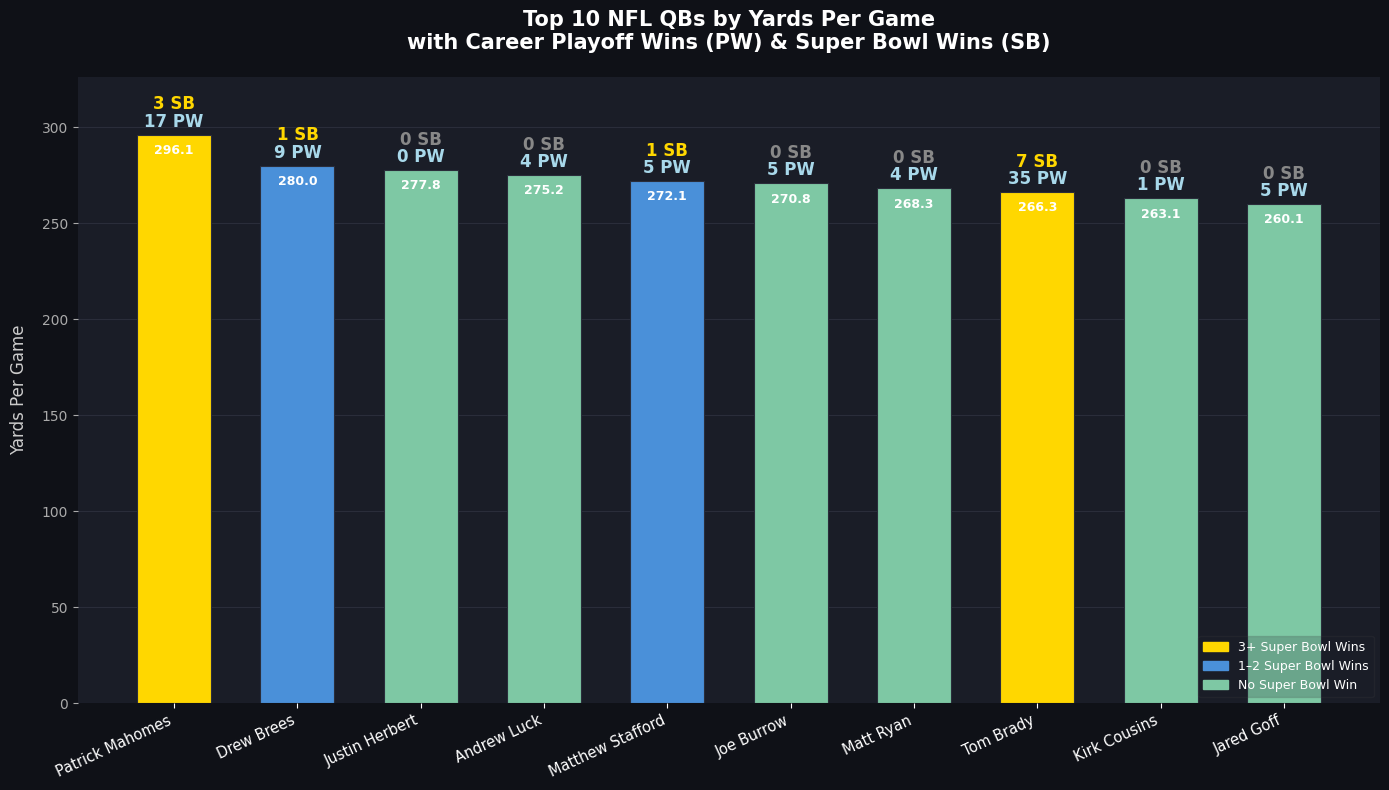

Saved!


In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

top10 = realnflqbstats.nlargest(10, "nfl-y/g").reset_index(drop=True)

names       = top10["name"].tolist()
ypg         = top10["nfl-y/g"].tolist()
pw          = top10["playoff_wins"].tolist()
sb          = top10["superbowl_wins"].tolist()

def bar_color(sb_wins):
    if sb_wins >= 3:   return "#FFD700" 
    elif sb_wins >= 1: return "#4A90D9"
    else:              return "#7EC8A4" 

colors = [bar_color(s) for s in sb]

fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor("#0F1117")
ax.set_facecolor("#1A1D27")

x = np.arange(len(names))
bars = ax.bar(x, ypg, color=colors, width=0.6, zorder=3, edgecolor="#2A2D3A", linewidth=0.8)

for i, (bar, p, s, y) in enumerate(zip(bars, pw, sb, ypg)):
    bar_top = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_top + 2,
        f"{p} PW",
        ha="center", va="bottom",
        fontsize=12, fontweight="bold",
        color="#A8D8EA"
    )
    sb_label = f"{s} SB" if s > 0 else "0 SB"
    sb_color = "#FFD700" if s > 0 else "#888888"
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_top + 11,
        sb_label,
        ha="center", va="bottom",
        fontsize=12, fontweight="bold",
        color=sb_color
    )
    # Y/G value inside bar
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_top - 5,
        f"{y:.1f}",
        ha="center", va="top",
        fontsize=9, fontweight="bold",
        color="white"
    )

ax.set_xticks(x)
ax.set_xticklabels(names, rotation=25, ha="right", fontsize=10.5, color="white")
ax.set_ylabel("Yards Per Game", fontsize=12, color="#CCCCCC", labelpad=10)
ax.set_title("Top 10 NFL QBs by Yards Per Game\nwith Career Playoff Wins (PW) & Super Bowl Wins (SB)",
             fontsize=15, fontweight="bold", color="white", pad=20)

ax.tick_params(axis="y", colors="#AAAAAA")
ax.tick_params(axis="x", colors="white")
ax.spines[["top", "right", "left", "bottom"]].set_visible(False)
ax.yaxis.grid(True, color="#2A2D3A", linewidth=0.8, zorder=0)
ax.set_axisbelow(True)

ymax = max(ypg) + 30
ax.set_ylim(0, ymax)

#legend
legend_patches = [
    mpatches.Patch(color="#FFD700", label="3+ Super Bowl Wins"),
    mpatches.Patch(color="#4A90D9", label="1–2 Super Bowl Wins"),
    mpatches.Patch(color="#7EC8A4", label="No Super Bowl Win"),
]
ax.legend(handles=legend_patches, loc="lower right", framealpha=0.2,
          labelcolor="white", fontsize=9, facecolor="#1A1D27", edgecolor="#444444")

plt.tight_layout()
plt.savefig("qb_yards_per_game_top10.png", dpi=150, bbox_inches="tight",
            facecolor=fig.get_facecolor())
plt.show()
print("Saved!")

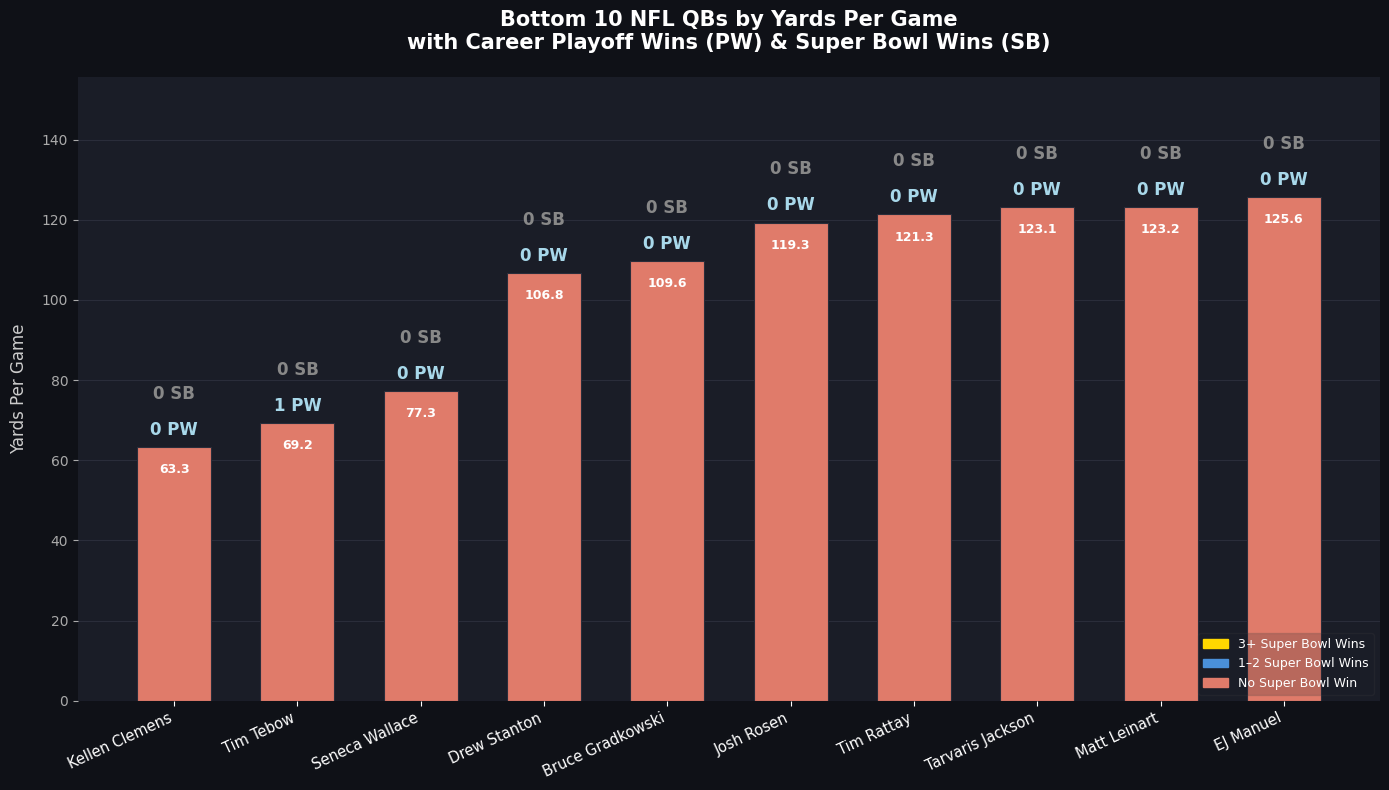

Saved!


In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

bottom10 = realnflqbstats.nsmallest(10, "nfl-y/g").reset_index(drop=True)

names = bottom10["name"].tolist()
ypg   = bottom10["nfl-y/g"].tolist()
pw    = bottom10["playoff_wins"].tolist()
sb    = bottom10["superbowl_wins"].tolist()

def bar_color(sb_wins):
    if sb_wins >= 3:   return "#FFD700"
    elif sb_wins >= 1: return "#4A90D9"
    else:              return "#E07B6A" 

colors = [bar_color(s) for s in sb]

fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor("#0F1117")
ax.set_facecolor("#1A1D27")

x = np.arange(len(names))
bars = ax.bar(x, ypg, color=colors, width=0.6, zorder=3, edgecolor="#2A2D3A", linewidth=0.8)

for i, (bar, p, s, y) in enumerate(zip(bars, pw, sb, ypg)):
    bar_top = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_top + 2,
        f"{p} PW",
        ha="center", va="bottom",
        fontsize=12, fontweight="bold",
        color="#A8D8EA"
    )
    sb_label = f"{s} SB" if s > 0 else "0 SB"
    sb_color = "#FFD700" if s > 0 else "#888888"
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_top + 11,
        sb_label,
        ha="center", va="bottom",
        fontsize=12, fontweight="bold",
        color=sb_color
    )
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_top - 4,
        f"{y:.1f}",
        ha="center", va="top",
        fontsize=9, fontweight="bold",
        color="white"
    )

ax.set_xticks(x)
ax.set_xticklabels(names, rotation=25, ha="right", fontsize=10.5, color="white")
ax.set_ylabel("Yards Per Game", fontsize=12, color="#CCCCCC", labelpad=10)
ax.set_title("Bottom 10 NFL QBs by Yards Per Game\nwith Career Playoff Wins (PW) & Super Bowl Wins (SB)",
             fontsize=15, fontweight="bold", color="white", pad=20)

ax.tick_params(axis="y", colors="#AAAAAA")
ax.tick_params(axis="x", colors="white")
ax.spines[["top", "right", "left", "bottom"]].set_visible(False)
ax.yaxis.grid(True, color="#2A2D3A", linewidth=0.8, zorder=0)
ax.set_axisbelow(True)

ymax = max(ypg) + 30
ax.set_ylim(0, ymax)

legend_patches = [
    mpatches.Patch(color="#FFD700", label="3+ Super Bowl Wins"),
    mpatches.Patch(color="#4A90D9", label="1–2 Super Bowl Wins"),
    mpatches.Patch(color="#E07B6A", label="No Super Bowl Win"),
]
ax.legend(handles=legend_patches, loc="lower right", framealpha=0.2,
          labelcolor="white", fontsize=9, facecolor="#1A1D27", edgecolor="#444444")

plt.tight_layout()
plt.savefig("qb_yards_per_game_bottom10.png", dpi=150, bbox_inches="tight",
            facecolor=fig.get_facecolor())
plt.show()
print("Saved!")

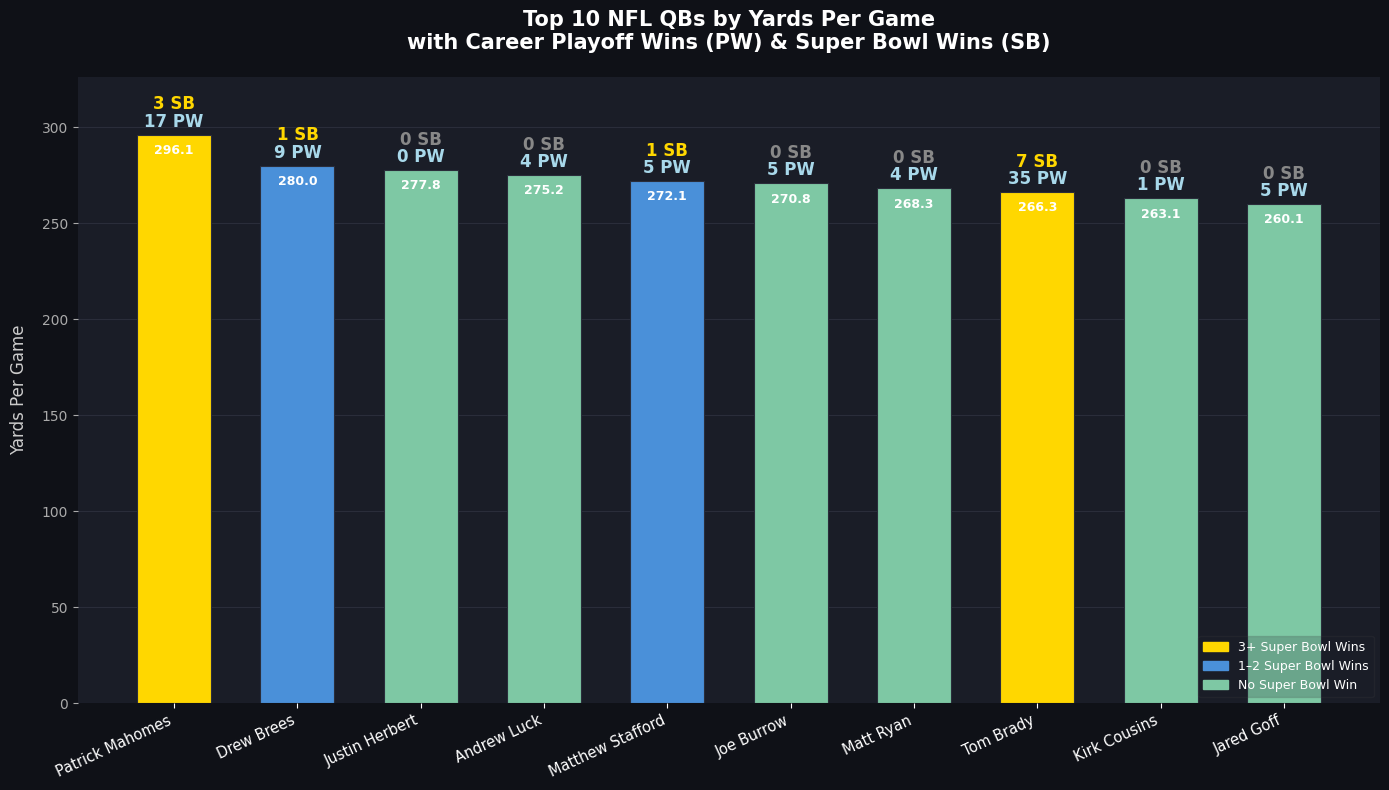

Saved!


In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

top10 = realnflqbstats.nlargest(10, "nfl-y/g").reset_index(drop=True)

names       = top10["name"].tolist()
ypg         = top10["nfl-y/g"].tolist()
pw          = top10["playoff_wins"].tolist()
sb          = top10["superbowl_wins"].tolist()

def bar_color(sb_wins):
    if sb_wins >= 3:   return "#FFD700" 
    elif sb_wins >= 1: return "#4A90D9"
    else:              return "#7EC8A4" 

colors = [bar_color(s) for s in sb]

fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor("#0F1117")
ax.set_facecolor("#1A1D27")

x = np.arange(len(names))
bars = ax.bar(x, ypg, color=colors, width=0.6, zorder=3, edgecolor="#2A2D3A", linewidth=0.8)

for i, (bar, p, s, y) in enumerate(zip(bars, pw, sb, ypg)):
    bar_top = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_top + 2,
        f"{p} PW",
        ha="center", va="bottom",
        fontsize=12, fontweight="bold",
        color="#A8D8EA"
    )
    sb_label = f"{s} SB" if s > 0 else "0 SB"
    sb_color = "#FFD700" if s > 0 else "#888888"
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_top + 11,
        sb_label,
        ha="center", va="bottom",
        fontsize=12, fontweight="bold",
        color=sb_color
    )
    # Y/G value inside bar
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_top - 5,
        f"{y:.1f}",
        ha="center", va="top",
        fontsize=9, fontweight="bold",
        color="white"
    )

ax.set_xticks(x)
ax.set_xticklabels(names, rotation=25, ha="right", fontsize=10.5, color="white")
ax.set_ylabel("Yards Per Game", fontsize=12, color="#CCCCCC", labelpad=10)
ax.set_title("Top 10 NFL QBs by Yards Per Game\nwith Career Playoff Wins (PW) & Super Bowl Wins (SB)",
             fontsize=15, fontweight="bold", color="white", pad=20)

ax.tick_params(axis="y", colors="#AAAAAA")
ax.tick_params(axis="x", colors="white")
ax.spines[["top", "right", "left", "bottom"]].set_visible(False)
ax.yaxis.grid(True, color="#2A2D3A", linewidth=0.8, zorder=0)
ax.set_axisbelow(True)

ymax = max(ypg) + 30
ax.set_ylim(0, ymax)

#legend
legend_patches = [
    mpatches.Patch(color="#FFD700", label="3+ Super Bowl Wins"),
    mpatches.Patch(color="#4A90D9", label="1–2 Super Bowl Wins"),
    mpatches.Patch(color="#7EC8A4", label="No Super Bowl Win"),
]
ax.legend(handles=legend_patches, loc="lower right", framealpha=0.2,
          labelcolor="white", fontsize=9, facecolor="#1A1D27", edgecolor="#444444")

plt.tight_layout()
plt.savefig("qb_yards_per_game_top10.png", dpi=150, bbox_inches="tight",
            facecolor=fig.get_facecolor())
plt.show()
print("Saved!")

As you can see there is a huge difference between these two groups of quarterbacks. On one hand we have a group of the top ten hihgest passing yard QBs per game against the bottom ten passing yard QBs per game and the difference is overwhelmingly clear, as it shows more passing yards leads to much better playoff runs as the all the bottom ten NFL QBs in passing yards in our dataset have a combined playoff win of just 1.

Our purpose of showing this is to is to illustrate how statistical data can reveal meaningful insightsand why our question to find which stats are the largest indicators will prove to be a both challenging and feasible goal of ours.

# What Counts as Postseason Success?

---
Before we continue with our analysis, its important we clarify what this project will define psotseason success as. To create a quantifiable number that will allow us to measure a quarterbacks postseason success we will create a formula that will create a value for each QBs performance in the playoffs by adding up all their playoff wins and adding their total superbowl wins multipled by 5. 


In [128]:
realnflqbstats["postseason_success"] = (
    realnflqbstats["playoff_wins"] +
    (realnflqbstats["superbowl_wins"] * 5)
)

In [129]:
realnflqbstats.sort_values(by='postseason_success', ascending=False)

,name,height (in),weight (lbs),nfl-team,nfl-starts,nfl-wins,nfl-losses,nfl-ties,nfl-winpr,nfl-qbr,nfl-cmp,nfl-att,nfl-inc,nfl-comp%,nfl-yds,nfl-tds,nfl-int,nfl-pick6,nfl-int%,nfl-sack%,nfl-y/a,nfl-ay/a,nfl-any/a,nfl-y/c,nfl-y/g,nfl-succ%,nfl-4qc,nfl-gwd,playoff_wins,superbowl_wins,postseason_success
106,Tom Brady,76,211,Patriots,333,251,82,0,0.75,97.2,7753,12050,4297,64.3,89214,649,212,18,1.8,4.48,7.4,7.69,7.06,11.5,266.3,49.6,46,58,35,7,70
24,Patrick Mahomes,75,229,Chiefs,96,74,22,0,0.77,103.5,2386,3590,1204,66.5,28424,219,63,4,1.8,3.96,7.9,8.35,7.76,11.9,296.1,52.6,14,16,17,3,32
85,Ben Roethlisberger,77,241,Steelers,247,165,81,1,0.67,93.5,5440,8443,3003,64.4,64088,418,211,18,2.5,6.16,7.6,7.46,6.59,11.8,257.4,48.2,41,53,13,2,23
76,Aaron Rodgers,74,223,Packers,224,148,75,1,0.66,103.6,5001,7661,2660,65.3,59055,475,105,4,1.4,6.48,7.7,8.33,7.35,11.8,255.6,48.4,21,31,11,1,16
83,Eli Manning,77,221,Giants,234,117,117,0,0.50,84.1,4895,8119,3224,60.3,57023,366,244,22,3.0,4.82,7.0,6.57,5.92,11.6,241.6,45.2,27,37,6,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,Jake Locker,75,227,Titans,23,9,14,0,0.39,79.0,408,709,301,57.5,4967,27,22,1,3.1,7.80,7.0,6.37,5.38,12.2,165.6,39.7,1,3,0,0,0
42,Brandon Weeden,76,221,Browns,25,6,19,0,0.24,76.0,559,965,406,57.9,6462,31,30,3,3.1,6.40,6.7,5.94,5.12,11.6,184.6,40.0,2,3,0,0,0
39,Mike Glennon,79,225,Buccaneers,31,6,25,0,0.19,78.6,689,1147,458,60.1,7025,47,35,3,3.1,6.75,6.1,5.57,4.70,10.2,175.6,40.2,3,4,0,0,0
38,Geno Smith,74,218,Jets,66,30,36,0,0.45,86.6,1314,2077,763,63.3,14823,84,57,9,2.7,7.65,7.1,6.71,5.64,11.3,192.5,44.6,9,15,0,0,0


With an actual value in mind for what determines how succesfful a quartbeack performed in the post season we will now be able to have a better understanding of what seperates succesfful QBs from Unsuccesful Quarterbacks.

In [130]:
successful_half = realnflqbstats[realnflqbstats["postseason_success"] < realnflqbstats["postseason_success"].median()]
unsuccessful_half = realnflqbstats[realnflqbstats["postseason_success"] >= realnflqbstats["postseason_success"].median()] 

print("QBs with high postseason success:", successful_half["postseason_success"].mean()) 
print("QBs with low postseason success:", unsuccessful_half["postseason_success"].mean())

QBs with high postseason success: nan
QBs with low postseason success: 2.8333333333333335


At first glance this result seems incorrect, but after deeper examination what this reveals is that more than half of all NFL QBs that play at least one full season worth of football games, only 38% of them will be able to obtain at least one playoff win. This demonstrates how difficult and competetive the NFL is, which is exactly why the QB is such an important piece of a teams success.

In [131]:
winners = realnflqbstats[realnflqbstats["postseason_success"] > 0].copy()
losers  = realnflqbstats[realnflqbstats["postseason_success"] == 0].copy()

len(winners) / len(realnflqbstats)

0.3888888888888889

Having established what post seasonsuccess is and truly understanding how difficult it is to be succeffull in the NFL we now have a much greater understanding of what counts as a succefull QB in the postseason.

# Passing Performance

---

Up above we took a brief look at just the players ranked by averageing passing yards per game, but total passing yards isnt the only stat taken into account when measuring a QBs ability to move the ball down the field, which is why in this part of the evaluation we will focus on completion percentage, passing yards per attempt, and average yards per game. Putting all these key passing stats together without making our data too messy we'll get a strong idea of what a great passer is.

In [132]:
import pandas as pd

passing_stats = realnflqbstats[[
    "name",
    "nfl-comp%",
    "nfl-y/g",
    "nfl-y/a",
    "postseason_success"
]].copy()

passing_stats.head()

,name,nfl-comp%,nfl-y/g,nfl-y/a,postseason_success
0,Bryce Young,59.8,179.8,5.5,0
1,Kenny Pickett,62.6,179.0,6.3,0
2,Desmond Ridder,64.0,186.5,7.0,0
3,Sam Howell,63.2,228.6,6.5,0
4,Brock Purdy,68.7,226.2,9.2,5


In [133]:
import plotly.express as px

passing_stats = passing_stats.copy()
passing_stats["size_scaled"] = (passing_stats["nfl-y/g"] / passing_stats["nfl-y/g"].max()) * 50 + 10

fig = px.scatter(
    passing_stats,
    x="nfl-y/g",
    y="postseason_success",
    size="size_scaled",
    color="nfl-y/a",
    color_continuous_scale="RdBu_r",
    hover_data={
        "name": True,
        "nfl-y/g": True,
        "nfl-y/a": True,
        "postseason_success": True,
        "size_scaled": False 
    },
    labels={
        "nfl-y/g": "Passing Yards/Game",
        "postseason_success": "Postseason Success",
        "nfl-y/a": "Yards/Attempt"
    },
    title="NFL QB Passing Performance vs Postseason Success\nSize = Yards/Game, Color = Yards/Attempt"
)

fig.update_traces(marker=dict(opacity=0.8, line=dict(width=1, color='black')))

fig.update_layout(
    coloraxis_colorbar=dict(title="Yards/Attempt"),
    plot_bgcolor="#F7F7F7",
    xaxis=dict(showgrid=True, gridcolor="#E0E0E0"),
    yaxis=dict(showgrid=True, gridcolor="#E0E0E0")
)

fig.show()

# Interceptions and Sacks

---

Now to switch things up lets look at a negative stat, that being interceptions and see how crucial it is among these successfull playoff performing quarterbacks.

In [134]:
realnflqbstats["postseason_success"] = (
    realnflqbstats["playoff_wins"] +
    (realnflqbstats["superbowl_wins"] * 5)
)

In [135]:
int_cols = ['nfl-int', 'nfl-pick6', 'nfl-int%']
realnflqbstats[int_cols].describe()

,nfl-int,nfl-pick6,nfl-int%
count,108.000000,108.000000,108.000000
mean,64.787037,6.564815,2.755556
std,53.348099,6.210141,0.650713
min,9.000000,0.000000,1.400000
25%,29.000000,3.000000,2.300000
50%,47.000000,5.000000,2.700000
75%,82.000000,9.000000,3.300000
max,244.000000,30.000000,4.300000


In [136]:
realnflqbstats[["nfl-int%", "postseason_success"]].corr()

,nfl-int%,postseason_success
nfl-int%,1.000000,-0.317142
postseason_success,-0.317142,1.000000


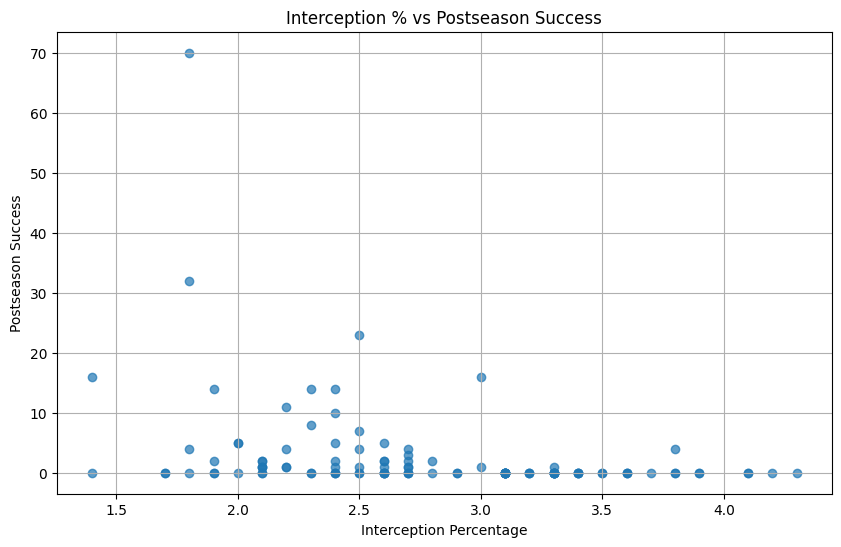

In [137]:
plt.figure(figsize=(10,6))
plt.scatter(realnflqbstats["nfl-int%"],
            realnflqbstats["postseason_success"],
            alpha=0.7)

plt.xlabel("Interception Percentage")
plt.ylabel("Postseason Success")
plt.title("Interception % vs Postseason Success")
plt.grid(True)
plt.show()

In [138]:
low_int  = realnflqbstats[realnflqbstats["nfl-int%"] < realnflqbstats["nfl-int%"].median()]
high_int = realnflqbstats[realnflqbstats["nfl-int%"] >= realnflqbstats["nfl-int%"].median()]

print("Low INT% avg postseason success:", low_int["postseason_success"].mean())
print("High INT% avg postseason success:", high_int["postseason_success"].mean())

Low INT% avg postseason success: 5.113207547169812
High INT% avg postseason success: 0.6363636363636364


As clearly shown by the scatter plot and with our calculation above quarterbacks that have a low interception percentage have a much larger result of post season success with it resulting in more than 8 times the score of postseason success than those who have less than the median interception percentage, demonstrating how critical of a statitic this is and the importance for the quarterback to keep the football out of harms way.

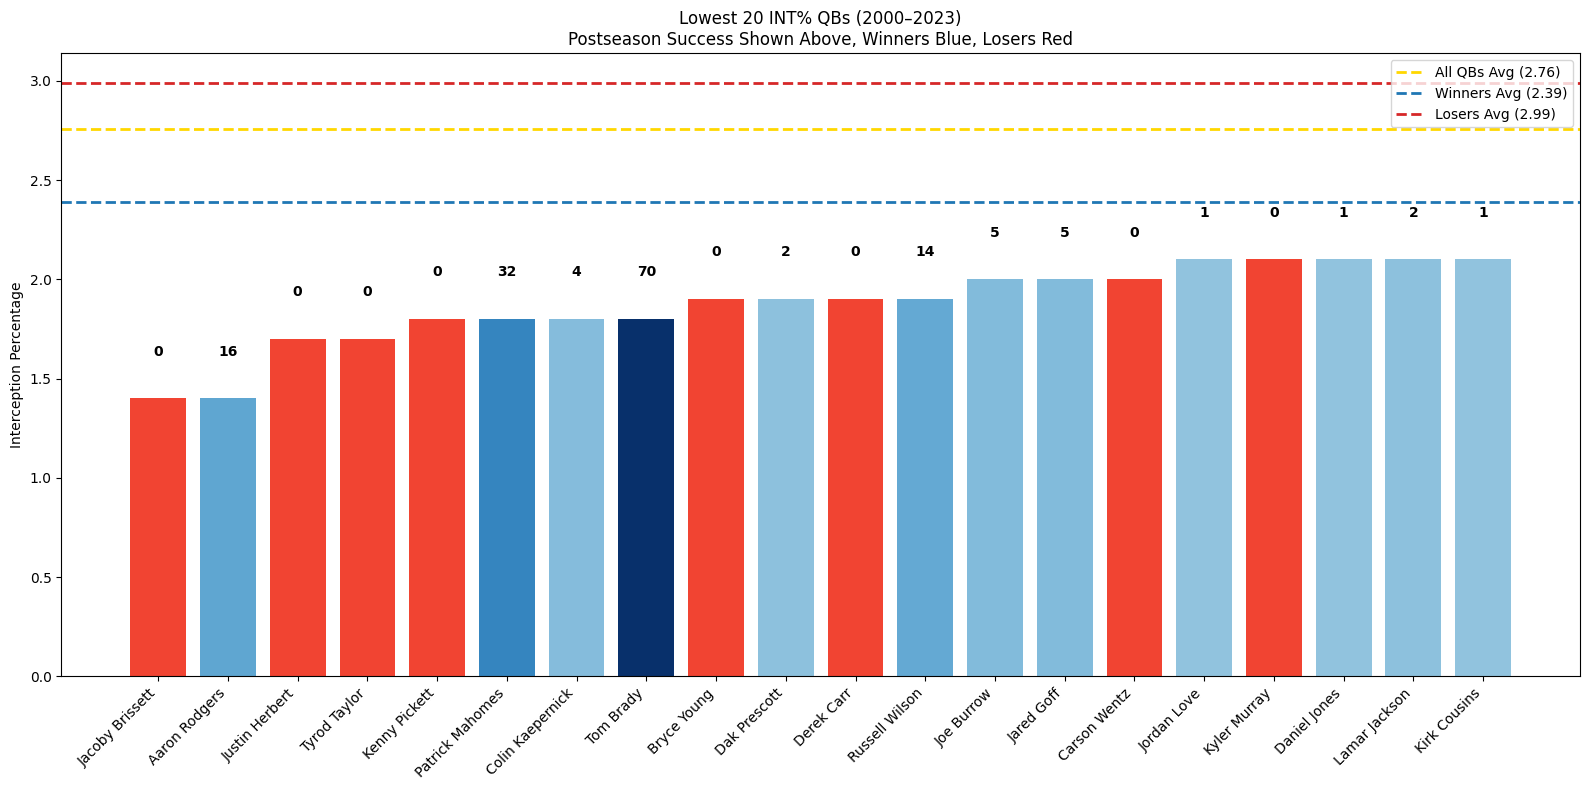

In [139]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

lowest20 = realnflqbstats.nsmallest(20, "nfl-int%").copy()

names = lowest20["name"].tolist()
int_pct = lowest20["nfl-int%"].tolist()
postseason = lowest20["postseason_success"].tolist()

colors = []
for p in postseason:
    if p > 0:
        colors.append(plt.cm.Blues(0.4 + 0.6 * (p / max(postseason))))
    else:
        colors.append(plt.cm.Reds(0.6))

x = np.arange(len(names))

plt.figure(figsize=(16,8))
bars = plt.bar(x, int_pct, color=colors)

for xi, y, p in zip(x, int_pct, postseason):
    plt.text(xi, y + 0.2, str(p),
             ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

overall_avg = realnflqbstats["nfl-int%"].mean()
winners_avg = winners["nfl-int%"].mean()
losers_avg  = losers["nfl-int%"].mean()

plt.axhline(overall_avg, color="gold", linestyle="--", linewidth=2, label=f"All QBs Avg ({overall_avg:.2f})")
plt.axhline(winners_avg, color="#1F77B4", linestyle="--", linewidth=2, label=f"Winners Avg ({winners_avg:.2f})")
plt.axhline(losers_avg, color="#D62728", linestyle="--", linewidth=2, label=f"Losers Avg ({losers_avg:.2f})")

plt.xticks(x, names, rotation=45, ha="right")
plt.ylabel("Interception Percentage")
plt.title("Lowest 20 INT% QBs (2000–2023)\nPostseason Success Shown Above, Winners Blue, Losers Red")

plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

Although the averages differ, in general it seems as though interceptions arent the deciding factor when it comes to post season success as crucially as passing yards. Although definetley significant what this bar chart shows is that even QBs with lower int% still manage to not have post season success. One example of this can be seen through Justin Herbert, so far in both categories we've measured he has appeared 3rd in both passing yards per game and int%, despite these impressive stats he doesn't have any playoff victories. On the other hand there are reucurring winners like Tom Brady and Patrick Mahomes who are performing very well in both metrics, so what we are learning is there is much more that goes into football games than initially thought.

Now lets take a look at sacks which is another QB stat which demonstrates a QBs ability to avoid being tackled behind the line of scrimmage and keeping a play alive. We will approach this in a similair way as we did the interceptions to see if.

In [140]:
realnflqbstats["nfl-sack%"].describe()

count    108.000000
mean       6.944907
std        1.690893
min        3.830000
25%        5.600000
50%        6.745000
75%        7.840000
max       12.350000
Name: nfl-sack%, dtype: float64

In [141]:
corr = realnflqbstats["nfl-sack%"].corr(realnflqbstats["postseason_success"])
print(f"Correlation between Sack% and Postseason Success: {corr:.2f}")

Correlation between Sack% and Postseason Success: -0.29


In [142]:
print("Avg Sack% of winners:", winners["nfl-sack%"].mean())
print("Avg Sack% of losers:", losers["nfl-sack%"].mean())

Avg Sack% of winners: 6.43357142857143
Avg Sack% of losers: 7.270303030303031


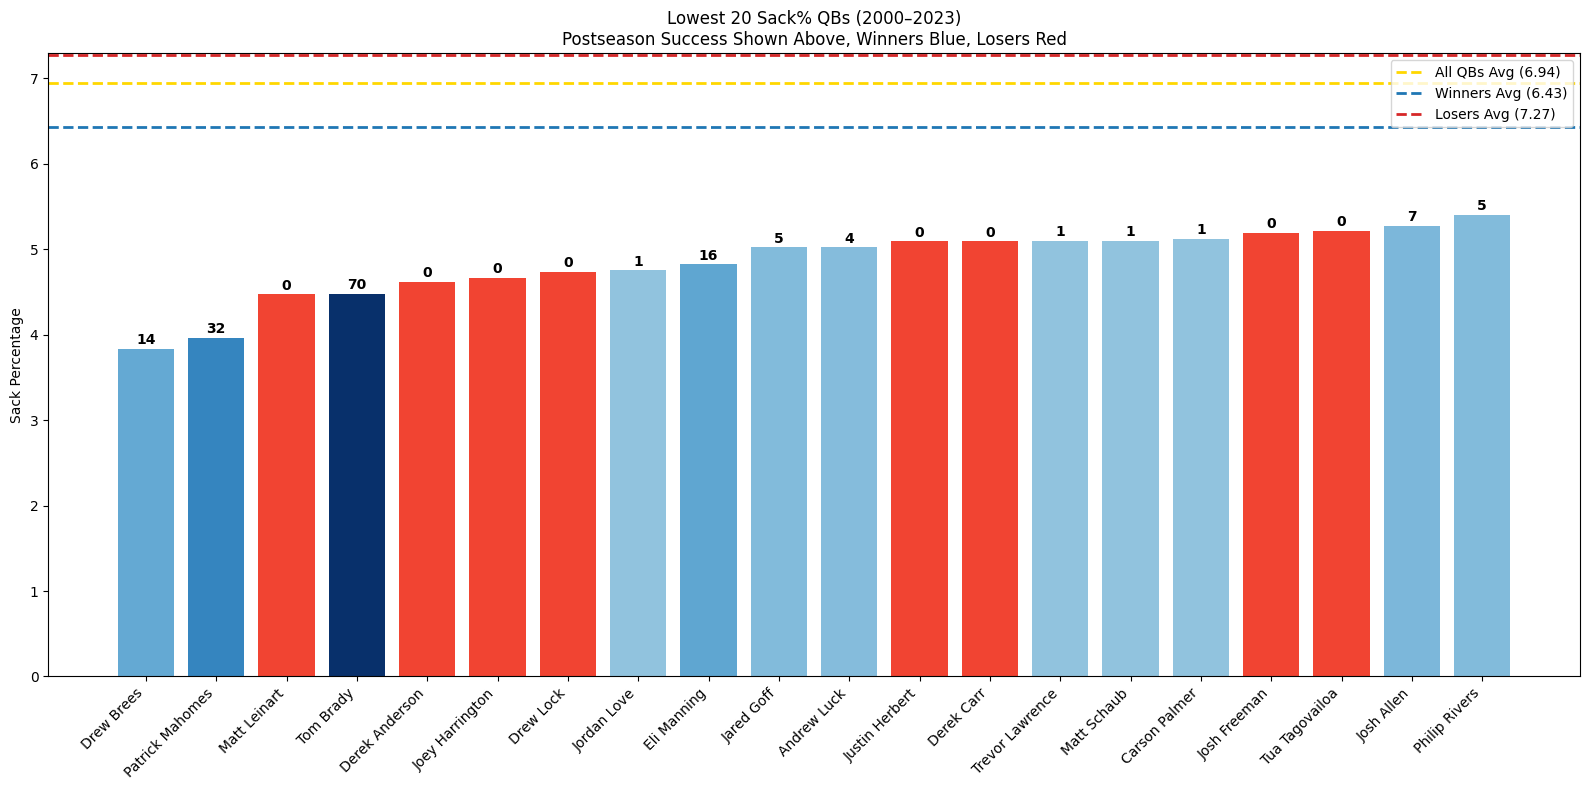

In [143]:

lowest20_sacks = realnflqbstats.nsmallest(20, "nfl-sack%").copy()

names = lowest20_sacks["name"].tolist()
sack_pct = lowest20_sacks["nfl-sack%"].tolist()
postseason = lowest20_sacks["postseason_success"].tolist()

colors = []
for p in postseason:
    if p > 0:
        colors.append(plt.cm.Blues(0.4 + 0.6 * (p / max(postseason))))
    else:
        colors.append(plt.cm.Reds(0.6))

x = np.arange(len(names))

plt.figure(figsize=(16,8))
bars = plt.bar(x, sack_pct, color=colors)

for xi, y, p in zip(x, sack_pct, postseason):
    plt.text(xi, y + 0.02, str(p),
             ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

overall_avg = realnflqbstats["nfl-sack%"].mean()
winners_avg = winners["nfl-sack%"].mean()
losers_avg  = losers["nfl-sack%"].mean()

plt.axhline(overall_avg, color="gold", linestyle="--", linewidth=2, label=f"All QBs Avg ({overall_avg:.2f})")
plt.axhline(winners_avg, color="#1F77B4", linestyle="--", linewidth=2, label=f"Winners Avg ({winners_avg:.2f})")
plt.axhline(losers_avg, color="#D62728", linestyle="--", linewidth=2, label=f"Losers Avg ({losers_avg:.2f})")

plt.xticks(x, names, rotation=45, ha="right")
plt.ylabel("Sack Percentage")
plt.title("Lowest 20 Sack% QBs (2000–2023)\nPostseason Success Shown Above, Winners Blue, Losers Red")

plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

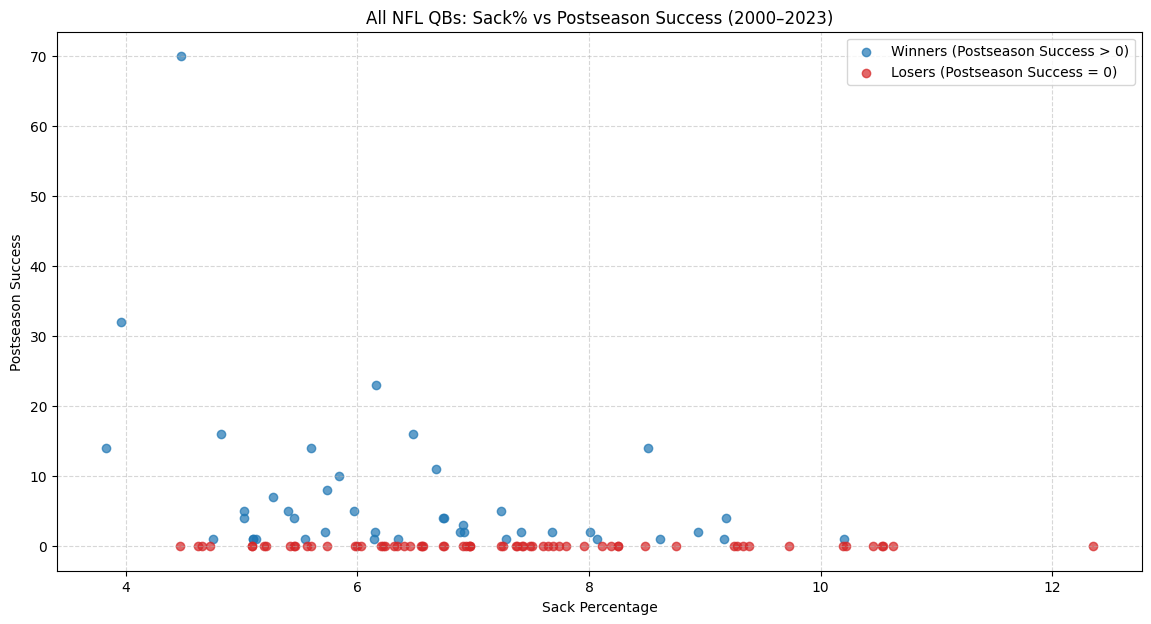

In [144]:
import matplotlib.pyplot as plt

# Separate winners and losers
winners_df = realnflqbstats[realnflqbstats["postseason_success"] > 0]
losers_df  = realnflqbstats[realnflqbstats["postseason_success"] == 0]

plt.figure(figsize=(14,7))

# Scatter plot
plt.scatter(winners_df["nfl-sack%"], winners_df["postseason_success"],
            color="#1F77B4", alpha=0.7, label="Winners (Postseason Success > 0)")

plt.scatter(losers_df["nfl-sack%"], losers_df["postseason_success"],
            color="#D62728", alpha=0.7, label="Losers (Postseason Success = 0)")

# Optional: add transparency (alpha) for overlapping points
plt.xlabel("Sack Percentage")
plt.ylabel("Postseason Success")
plt.title("All NFL QBs: Sack% vs Postseason Success (2000–2023)")

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.show()

The results for sacks turned out to be very similair to interceptions, as the results were as expected in that QBs getting sacked less turned out to be a strong indicator of QB success but it seems to be found in unsuccessful QBs as well showing its not a huge indicator but definetley plays a role in who wins.

# Ability to Score
---